In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced
from collections import Counter

C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
data_df_initial = pd.read_csv(Path("df_final_outer_patrick.csv"))
data_df_initial = data_df_initial.dropna()
names_df = data_df_initial['Player']
data_df = data_df_initial.drop(columns=['Player','Tm','Unnamed: 0','Cap Hit'])


In [3]:
data_df

,Salary,Age,GP,G,A,PTS,+/-,PIM,PS,EV,...,Tm_VAN,Tm_VEG,Tm_WPG,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W
0,"10,000,000",25.0,66.000000,35.000000,47.000000,82.000000,32.000000,54.000000,9.900000,19.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,"10,000,000",25.0,23.000000,9.000000,8.000000,17.000000,2.000000,8.000000,1.900000,6.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,"10,000,000",35.0,56.000000,12.000000,42.000000,54.000000,-6.000000,32.000000,4.300000,10.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,"10,000,000",29.0,68.000000,28.000000,22.000000,50.000000,-12.000000,22.000000,5.500000,23.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,"9,500,000",30.0,61.000000,23.000000,36.000000,59.000000,-3.000000,26.000000,5.900000,18.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,"500,000",34.0,41.333333,2.666667,8.000000,10.666667,-10.000000,9.333333,0.200000,2.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
657,"412,500",34.0,24.666667,5.333333,6.666667,12.000000,3.333333,8.000000,1.266667,4.666667,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
659,"7,500,000",25.0,61.000000,15.000000,42.000000,57.000000,38.000000,26.000000,9.500000,12.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
661,"4,000,000",29.0,69.000000,6.000000,13.000000,19.000000,-21.000000,49.000000,2.500000,6.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
#for salary in data_df['Salary']:
#    data_df['Salary'] = int(data_df['Salary'].replace(',',''))
#    print(data_df)

data_df["Salary"] = data_df["Salary"].replace('[,]', '', regex=True).astype(float)
data_df["Salary"]


0      10000000.0
1      10000000.0
2      10000000.0
3      10000000.0
4       9500000.0
          ...    
656      500000.0
657      412500.0
659     7500000.0
661     4000000.0
674     4500000.0
Name: Salary, Length: 628, dtype: float64

In [5]:
# Create our features

#y = data_df["Salary"].astype(float)
y = data_df["Salary"]



In [6]:
# Create our target
X = data_df.drop(columns=['Salary'])

In [7]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
# Scale the training and testing data
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [9]:
y = y.array
y =y.reshape(-1, 1)

y_train = y_train.array
y_train =y_train.reshape(-1, 1)

y_test= y_test.array
y_test =y_test.reshape(-1, 1)

In [10]:
X_scaler = scaler.fit(X)
X = X_scaler.transform(X)

In [11]:
y_scaler = scaler
y_scaler.fit(y)
y = y_scaler.transform(y)

In [12]:
y_scaler = scaler.fit(y_train)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

In [13]:
y_test

array([[-0.8214645 ],
       [ 0.78226177],
       [-0.8214645 ],
       [ 0.25566508],
       [-0.16321864],
       [ 1.69183786],
       [ 2.40992424],
       [-0.8214645 ],
       [-0.53422994],
       [-0.8214645 ],
       [-0.80949639],
       [-0.70178343],
       [ 3.12801063],
       [ 1.4046033 ],
       [-0.94114556],
       [ 2.31417939],
       [-0.39061266],
       [-0.78196974],
       [-0.8214645 ],
       [-0.8214645 ],
       [-0.78196974],
       [-0.8214645 ],
       [-0.8214645 ],
       [-0.22305917],
       [-0.8214645 ],
       [-0.8214645 ],
       [-0.8214645 ],
       [ 0.25566508],
       [ 2.64928637],
       [-0.8214645 ],
       [-0.78196974],
       [ 0.73438934],
       [-0.8214645 ],
       [-0.8214645 ],
       [-0.65391101],
       [ 1.2131136 ],
       [ 0.37534615],
       [-0.8214645 ],
       [ 0.25566508],
       [ 0.56683585],
       [-0.70178343],
       [ 1.2131136 ],
       [ 2.40992424],
       [ 3.12801063],
       [ 1.09343253],
       [ 0

In [14]:
## Linear regression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")
print(f"The standard deviation is {std}.")


The r2 is 0.3339225677783072.
The mean squared error is 0.8682400910375617.
The root mean squared error is 0.9317940174939747.
The standard deviation is 1.0.


In [15]:
## Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.3367405442164577.
The mean squared error is 0.8645668242357716.
The root mean squared error is 0.9298208559909654.


In [16]:
## DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is -0.3167999637892507.
The mean squared error is 1.71646488100517.
The root mean squared error is 1.3101392601571673.


In [17]:
## HuberRegressor (factors in outliers)
from sklearn.linear_model import HuberRegressor, LinearRegression
model = HuberRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print relevant metrics.
#print(f"The score is {score}.")
print(f"The r2 is {r2}.")
print(f"The mean squared error is {mse}.")
print(f"The root mean squared error is {rmse}.")

The r2 is 0.293534103500821.
The mean squared error is 0.9208869489024.
The root mean squared error is 0.9596285473569448.


C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\sklearn\linear_model\_huber.py:332: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
## data must be very non linear, maybe use Tensorflow or Keras

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [19]:
tf.random.set_seed(420)

In [20]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8135261317830327199
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5731516416
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12795059296521559564
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [21]:
X.shape

(628, 62)

In [22]:
number_inputs = 62
number_hidden_nodes = 1800

In [23]:
nn = Sequential()
nn.add(Dense(units=number_hidden_nodes, input_dim=number_inputs, activation="sigmoid"))
nn.add(Dense(1, activation="sigmoid"))

In [24]:
# Compile model
nn.compile(loss=keras.losses.MeanSquaredError(), optimizer="adam",metrics=["mean_squared_error"])

In [25]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1800)              113400    
                                                                 
 dense_1 (Dense)             (None, 1)                 1801      
                                                                 
Total params: 115,201
Trainable params: 115,201
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Fit the model
nn_model = nn.fit(X_train, y_train, epochs=1500)

Epoch 1/1500
15/15 [==============================] - 1s 2ms/step - loss: 1.0018 - mean_squared_error: 1.0018
Epoch 2/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.9787 - mean_squared_error: 0.9787
Epoch 3/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.9156 - mean_squared_error: 0.9156
Epoch 4/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.8637 - mean_squared_error: 0.8637
Epoch 5/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.8834 - mean_squared_error: 0.8834
Epoch 6/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.8832 - mean_squared_error: 0.8832
Epoch 7/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.9241 - mean_squared_error: 0.9241
Epoch 8/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.9711 - mean_squared_error: 0.9711
Epoch 9/1500
15/15 [==============================] - 0s 3ms/step - loss: 0.8964 - mean_squared_error: 0.8964
Epoch 10/1

In [27]:
#y_scaler = scaler
#y_scaler.fit(y)
#y = y_scaler.transform(y)
#from sklearn.preprocessing import inverse_transform
y_pred = nn.predict(X)
y_pred_salary = y_scaler.inverse_transform(y_pred)

In [28]:
y_pred_salary

array([[4554830. ],
       [4554830. ],
       [4554830. ],
       [4554039. ],
       [4554820. ],
       [3077336.5],
       [2474386.8],
       [4554830. ],
       [4554830. ],
       [2465947.5],
       [4554825.5],
       [4554830. ],
       [2465947. ],
       [4554830. ],
       [4554830. ],
       [4554116. ],
       [4544285. ],
       [2465945. ],
       [4554830. ],
       [2465945. ],
       [4554277. ],
       [2465945. ],
       [4554830. ],
       [4554021.5],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [2466396.8],
       [2465946. ],
       [2465945. ],
       [4554830. ],
       [2465949.8],
       [2465945. ],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [2465945. ],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [4554830. ],
       [4553672. ],
       [2465945. ],
       [4554830. ],
       [4348082. ],
       [4554830. ],
       [4554830. ],
       [2465945. ],


In [29]:
model_loss, model_accuracy = nn.evaluate(X_test, y_test, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

5/5 - 0s - loss: 1.1797 - mean_squared_error: 1.1797 - 104ms/epoch - 21ms/step
Normal Neural Network - Loss: 1.179725170135498, Accuracy: 1.179725170135498



Bad key text.latex.preview in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\johng\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, 

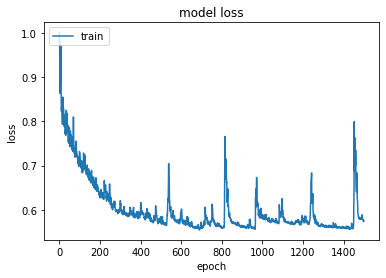

In [30]:
import matplotlib.pyplot as plt
# summarize history for loss
plt.plot(nn_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [31]:
# Compute the metrics for the linear regression model
#from sklearn.metrics import mean_squared_error, r2_score
#score = nn_model.score(X_test, y_test, sample_weight=None)
#r2 = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#std = np.std(y)

# Print relevant metrics.
#print(f"The score is {score}.")
#print(f"The r2 is {r2}.")
#print(f"The mean squared error is {mse}.")
#print(f"The root mean squared error is {rmse}.")
#print(f"The standard deviation is {std}.")

In [32]:
y_pred = nn.predict(X)
data_df_initial["Y Scaled"] = y
data_df_initial["Y Pred"]= y_pred
data_df_initial["Predicted Salary"]= y_pred_salary
df_review = data_df_initial
df_review=df_review.sort_values("Y Pred")

In [33]:
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='regression'
)

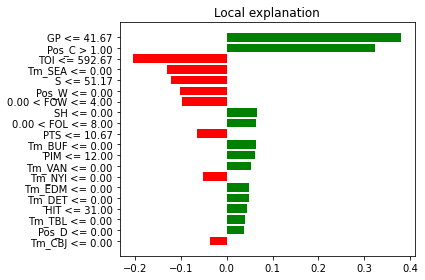

In [57]:
exp = explainer.explain_instance(X[15], nn.predict,
        num_features=20)

exp.as_pyplot_figure()
from matplotlib import pyplot as plt
plt.tight_layout()

In [35]:
df_review.head(75)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary
452,509,Urho Vaakanainen,ANA,"832,500","894,167",23.0,12.666667,0.000000,3.333333,3.333333,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.761101,0.000000e+00,2465945.0
596,664,Sean Durzi,LAK,"750,000","809,166",23.0,53.000000,3.000000,21.000000,24.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.000000e+00,2465945.0
595,663,Jordan Spence,LAK,"750,000","820,000",20.0,13.000000,1.000000,4.000000,5.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.000000e+00,2465945.0
594,662,Carl Grundstrom,LAK,"750,000","725,000",24.0,47.000000,8.000000,5.000000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.799175,0.000000e+00,2465945.0
338,387,Vladislav Namestnikov,DAL,"1,250,000","1,000,000",29.0,44.000000,9.333333,8.666667,18.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.568426,0.000000e+00,2465945.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,274,Radko Gudas,FLA,"2,500,000","2,500,000",31.0,67.000000,2.000000,12.000000,14.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.008446,5.857807e-32,2465945.0
552,616,Jeffrey Viel,SJS,"750,000","750,000",25.0,29.000000,3.000000,2.000000,5.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.799175,6.852339e-32,2465945.0
219,255,Frank Vatrano,NYR,"2,600,000","2,533,333",27.0,39.333333,10.000000,7.333333,17.333333,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.054596,7.956011e-32,2465945.0
513,573,Mathieu Joseph,OTT,"775,000","737,500",24.0,42.666667,7.333333,10.000000,17.333333,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.787637,1.079547e-31,2465945.0


In [36]:
df_review.tail(75)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Tm_WSH,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary
620,692,Zach Parise,NYI,"750,000","750,000",37.0,68.0,11.0,17.0,28.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.799175,1.0,4554830.0
7,7,Sidney Crosby,PIT,"9,000,000","8,700,000",34.0,58.0,26.0,46.0,72.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.008181,1.0,4554830.0
8,8,Anders Lee,NYI,"9,000,000","7,000,000",31.0,62.0,25.0,16.0,41.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.008181,1.0,4554830.0
648,720,Oliver Kylington,CGY,"750,000","750,000",24.0,64.0,8.0,19.0,27.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,1.0,4554830.0
85,103,Ryan Pulock,NYI,"5,160,000","5,000,000",27.0,43.0,3.0,13.0,16.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.236030,1.0,4554830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,200,Bryan Rust,PIT,"3,500,000","3,500,000",29.0,48.0,22.0,34.0,56.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.469944,1.0,4554830.0
174,205,Jesper Bratt,NJD,"3,450,000","2,750,000",23.0,64.0,22.0,43.0,65.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.446869,1.0,4554830.0
175,206,David Perron,STL,"3,412,500","4,000,000",33.0,54.0,23.0,24.0,47.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.429563,1.0,4554830.0
196,231,Dylan DeMelo,WPG,"3,000,000","3,000,000",28.0,64.0,1.0,10.0,11.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.239195,1.0,4554830.0


In [37]:
df_review['Predicted Salary'].value_counts()

2465945.00    314
4554830.00    114
2465945.25     10
4554829.50      5
2465945.50      4
             ... 
2476895.50      1
2480135.75      1
2481295.50      1
2481993.25      1
2649623.75      1
Name: Predicted Salary, Length: 174, dtype: int64

<AxesSubplot:xlabel='Salary', ylabel='Predicted Salary'>

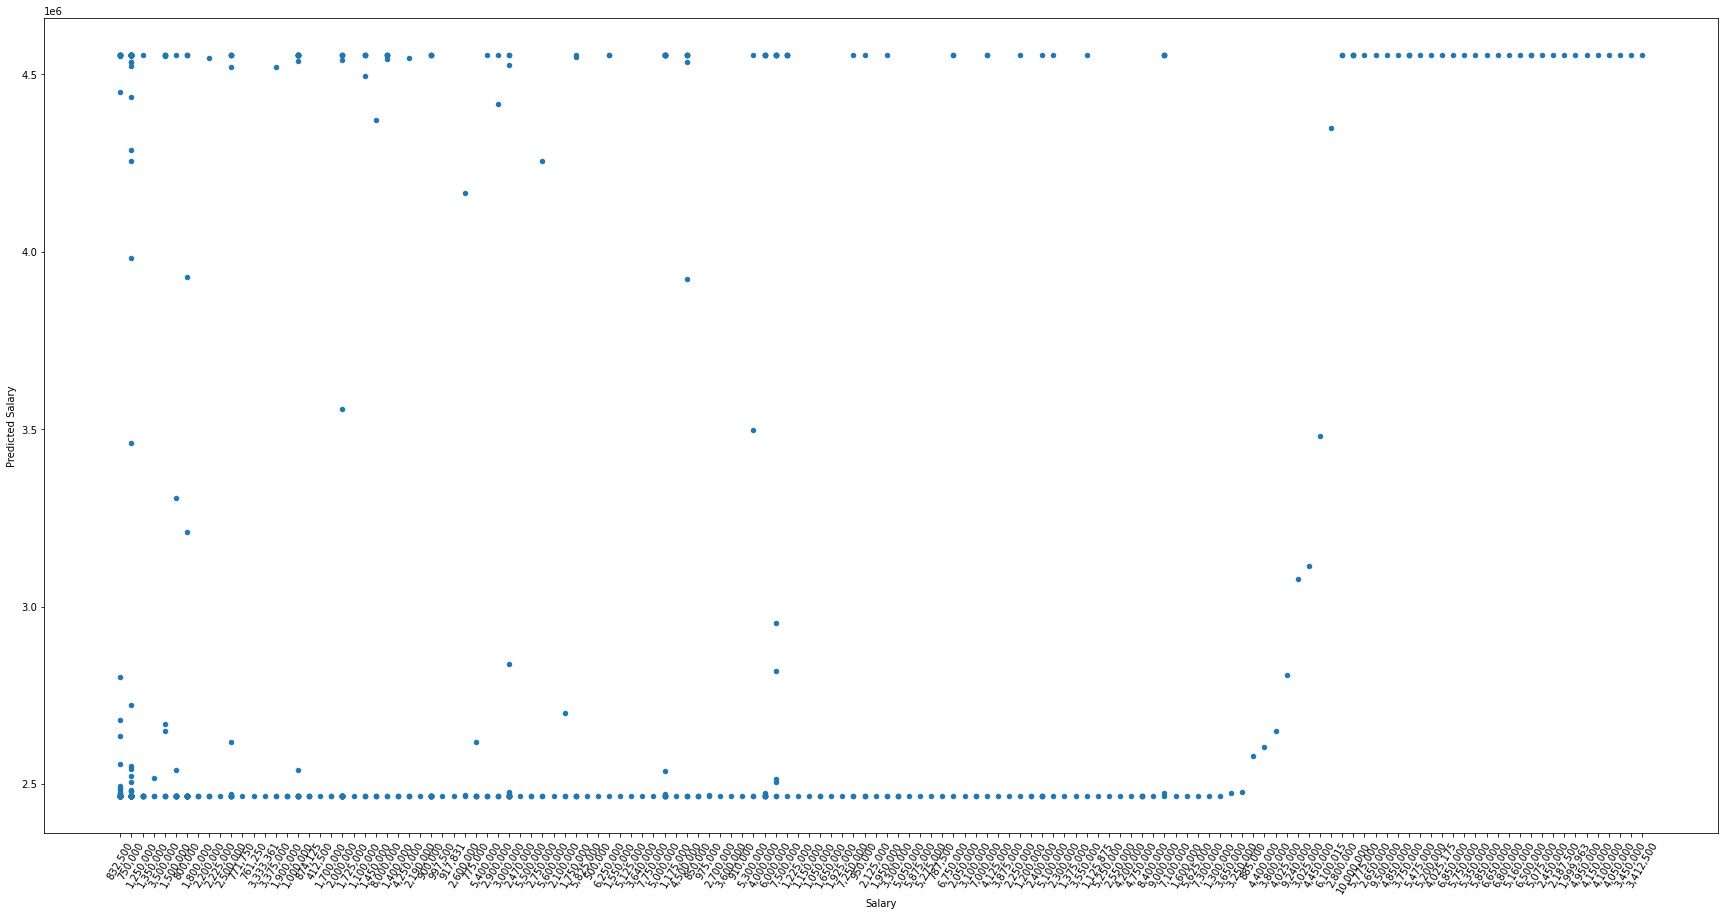

In [38]:
import hvplot
#df_review = pd.DataFrame(df_review)
df_review.plot.scatter(x='Salary', y='Predicted Salary',figsize=(30,15),rot=60)

In [60]:
df_review['Delta'] = df_review['Predicted Salary'] - data_df['Salary']

In [62]:
df_review.head(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary,Delta
452,509,Urho Vaakanainen,ANA,"832,500","894,167",23.0,12.666667,0.000000,3.333333,3.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.761101,0.0,2465945.0,1633445.0
596,664,Sean Durzi,LAK,"750,000","809,166",23.0,53.000000,3.000000,21.000000,24.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.0,2465945.0,1715945.0
595,663,Jordan Spence,LAK,"750,000","820,000",20.0,13.000000,1.000000,4.000000,5.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.0,2465945.0,1715945.0
594,662,Carl Grundstrom,LAK,"750,000","725,000",24.0,47.000000,8.000000,5.000000,13.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.799175,0.0,2465945.0,1715945.0
338,387,Vladislav Namestnikov,DAL,"1,250,000","1,000,000",29.0,44.000000,9.333333,8.666667,18.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.568426,0.0,2465945.0,1215945.0
593,661,Phillip Danault,LAK,"750,000","5,500,000",28.0,69.000000,21.000000,21.000000,42.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,0.0,2465945.0,1715945.0
335,384,Ilya Lyubushkin,TOR,"1,350,000","1,350,000",27.0,42.666667,0.000000,6.666667,6.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.522276,0.0,2465945.0,1115945.0
166,195,Nick Leddy,STL,"3,500,000","2,750,000",30.0,41.333333,1.333333,11.333333,12.666667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.469944,0.0,2465945.0,-1034055.0
316,364,Trevor Moore,LAK,"1,500,000","1,875,000",26.0,71.000000,13.000000,28.000000,41.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.453052,0.0,2465945.0,965945.0
580,646,Andrej Sustr,ANA,"750,000","750,000",31.0,18.000000,0.666667,0.666667,1.333333,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.799175,0.0,2465945.0,1715945.0


In [63]:
df_review.tail(10)

,Unnamed: 0,Player,Tm,Salary,Cap Hit,Age,GP,G,A,PTS,...,Pos_C,Pos_D,Pos_F,Pos_LW,Pos_RW,Pos_W,Y Scaled,Y Pred,Predicted Salary,Delta
541,605,Ryan Poehling,MTL,"750,000","750,000",23.0,46.0,5.0,8.0,13.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,1.0,4554830.0,3804830.0
539,603,Laurent Dauphin,MTL,"750,000","750,000",26.0,34.0,4.0,8.0,12.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-0.799175,1.0,4554830.0,3804830.0
161,190,Devon Toews,COL,"3,550,000","4,100,000",27.0,58.0,13.0,37.0,50.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.493019,1.0,4554830.0,1004830.0
164,193,Mike Hoffman,MTL,"3,500,000","4,500,000",32.0,54.0,11.0,14.0,25.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.469944,1.0,4554830.0,1054830.0
170,199,Neal Pionk,WPG,"3,500,000","5,875,000",26.0,65.0,3.0,27.0,30.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.469944,1.0,4554830.0,1054830.0
171,200,Bryan Rust,PIT,"3,500,000","3,500,000",29.0,48.0,22.0,34.0,56.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.469944,1.0,4554830.0,1054830.0
174,205,Jesper Bratt,NJD,"3,450,000","2,750,000",23.0,64.0,22.0,43.0,65.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.446869,1.0,4554830.0,1104830.0
175,206,David Perron,STL,"3,412,500","4,000,000",33.0,54.0,23.0,24.0,47.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.429563,1.0,4554830.0,1142330.0
196,231,Dylan DeMelo,WPG,"3,000,000","3,000,000",28.0,64.0,1.0,10.0,11.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.239195,1.0,4554830.0,1554830.0
0,0,Mikko Rantanen,COL,"10,000,000","9,250,000",25.0,66.0,35.0,47.0,82.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.469678,1.0,4554830.0,-5445170.0
